Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


In [1]:
dataurl = 'https://raw.githubusercontent.com/Nckflannery/Unit2-Project/master/Data/NFL%20Combine%20Data%20-%20Combine%20Results.csv'
import pandas as pd
df = pd.read_csv(dataurl)

In [2]:
df.head()

,Year,Name,YearName,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle,Pick,Round
0,2015,Ameer Abdullah,2015Ameer Abdullah,Nebraska,RB,68.75,205,8.63,30.00,NaN,4.60,24.0,42.5,130.0,3.95,6.79,11.18,54.0,2.0
1,2015,Nelson Agholor,2015Nelson Agholor,Southern California,WR,72.13,198,9.25,32.25,NaN,4.42,12.0,NaN,NaN,NaN,NaN,NaN,20.0,1.0
2,2015,Malcolm Agnew,2015Malcolm Agnew,Southern Illinois,RB,70.00,202,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Jay Ajayi,2015Jay Ajayi,Boise State,RB,71.75,221,10.00,32.00,24.0,4.57,19.0,39.0,121.0,4.10,7.10,11.10,149.0,5.0
4,2015,Brandon Alexander,2015Brandon Alexander,Central Florida,FS,74.00,195,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Let's rename the columns to make our lives easier later
df.columns

Index(['Year', 'Name', 'YearName', 'College', 'POS', 'Height (in)',
       'Weight (lbs)', 'Hand Size (in)', 'Arm Length (in)', 'Wonderlic',
       '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)',
       'Shuttle', '3Cone', '60Yd Shuttle', 'Pick', 'Round'],
      dtype='object')

In [118]:
df.columns = ['Year', 'Name', 'YearName', 'College', 'POS', 'Height',
       'Weight', 'Hand Size', 'Arm Length', 'Wonderlic',
       '40 Yard', 'Bench Press', 'Vert Leap', 'Broad Jump',
       'Shuttle', '3Cone', '60Yd Shuttle', 'Pick', 'Round']

In [119]:
df.head()

,Year,Name,YearName,College,POS,Height,Weight,Hand Size,Arm Length,Wonderlic,40 Yard,Bench Press,Vert Leap,Broad Jump,Shuttle,3Cone,60Yd Shuttle,Pick,Round
0,2015,Ameer Abdullah,2015Ameer Abdullah,Nebraska,RB,68.75,205,8.63,30.00,NaN,4.60,24.0,42.5,130.0,3.95,6.79,11.18,54.0,2.0
1,2015,Nelson Agholor,2015Nelson Agholor,Southern California,WR,72.13,198,9.25,32.25,NaN,4.42,12.0,NaN,NaN,NaN,NaN,NaN,20.0,1.0
2,2015,Malcolm Agnew,2015Malcolm Agnew,Southern Illinois,RB,70.00,202,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Jay Ajayi,2015Jay Ajayi,Boise State,RB,71.75,221,10.00,32.00,24.0,4.57,19.0,39.0,121.0,4.10,7.10,11.10,149.0,5.0
4,2015,Brandon Alexander,2015Brandon Alexander,Central Florida,FS,74.00,195,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Choose a target

In [343]:
# Our target will be 'Round'. Given someone's ht, wt, combine stats, and college, can we predict where in the draft they will be picked?
df['Round'].describe()

count    5713.000000
mean        4.342202
std         2.484405
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        12.000000
Name: Round, dtype: float64

In [342]:
df['Round'].value_counts()

3.0     815
2.0     801
4.0     798
1.0     762
5.0     748
6.0     675
7.0     672
8.0     121
9.0      87
10.0     85
11.0     77
12.0     72
Name: Round, dtype: int64

# Train, test, val split

In [365]:
# Let's use the 2015 year as our test data
# and random split the rest into train/val
split = 2015
train = df[df['Year'] < split]
test = df[df['Year'] == split]
train.shape, test.shape, df.shape

((8571, 19), (741, 19), (9312, 19))

In [366]:
from sklearn.model_selection import train_test_split

my_train, my_val = train_test_split(train, random_state=42, test_size=.2)
my_train.shape, my_val.shape, train.shape

((6856, 19), (1715, 19), (8571, 19))

In [367]:
target = 'Round'
exclude = ['Year', 'Name', 'YearName', 'Pick', 'Round']

In [368]:
X_train = my_train.drop(exclude, axis=1)
y_train = my_train[target]
X_val = my_val.drop(exclude, axis=1)
y_val = my_val[target]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6856, 14), (6856,), (1715, 14), (1715,))

# Determine problem type and choose evaluation metric

### This will be a regression problem.

In [333]:
# Since there are multiple modes, we will use the mean as the baseline
x = df.copy()
baseline = x['Round'].mean().astype(int)
x['base_pred'] = [baseline] * len(x['Round'])

In [334]:
x.head()

,Year,Name,YearName,College,POS,Height,Weight,Hand Size,Arm Length,Wonderlic,40 Yard,Bench Press,Vert Leap,Broad Jump,Shuttle,3Cone,60Yd Shuttle,Pick,Round,base_pred
0,2015,Ameer Abdullah,2015Ameer Abdullah,Nebraska,RB,68.75,205,8.63,30.00,NaN,4.60,24.0,42.5,130.0,3.95,6.79,11.18,54.0,2.0,4
1,2015,Nelson Agholor,2015Nelson Agholor,Southern California,WR,72.13,198,9.25,32.25,NaN,4.42,12.0,NaN,NaN,NaN,NaN,NaN,20.0,1.0,4
2,2015,Malcolm Agnew,2015Malcolm Agnew,Southern Illinois,RB,70.00,202,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,2015,Jay Ajayi,2015Jay Ajayi,Boise State,RB,71.75,221,10.00,32.00,24.0,4.57,19.0,39.0,121.0,4.10,7.10,11.10,149.0,5.0,4
4,2015,Brandon Alexander,2015Brandon Alexander,Central Florida,FS,74.00,195,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [329]:
from sklearn.metrics import accuracy_score
base_pred = x['base_pred']
y_true = x['Round']
accuracy_score(base_pred, y_true)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [335]:
# We need to deal with NaN's first
# Pick goes up to 336. Since a higher pick is a worse outcome, we will replace the NaNs with HIGH values
x['Round'] = x['Round'].fillna(20)

In [336]:
x['Round'].describe()

count    9312.000000
mean       10.393793
std         7.869280
min         1.000000
25%         3.000000
50%         7.000000
75%        20.000000
max        20.000000
Name: Round, dtype: float64

In [337]:
# We now see that our mode is overwhelmingly undrafted! (20)
baseline = x['Round'].mode()[0].astype(int)
x['base_pred'] = [baseline] * len(x['Round'])
base_pred = x['base_pred']

In [338]:
x.head()

,Year,Name,YearName,College,POS,Height,Weight,Hand Size,Arm Length,Wonderlic,40 Yard,Bench Press,Vert Leap,Broad Jump,Shuttle,3Cone,60Yd Shuttle,Pick,Round,base_pred
0,2015,Ameer Abdullah,2015Ameer Abdullah,Nebraska,RB,68.75,205,8.63,30.00,NaN,4.60,24.0,42.5,130.0,3.95,6.79,11.18,54.0,2.0,20
1,2015,Nelson Agholor,2015Nelson Agholor,Southern California,WR,72.13,198,9.25,32.25,NaN,4.42,12.0,NaN,NaN,NaN,NaN,NaN,20.0,1.0,20
2,2015,Malcolm Agnew,2015Malcolm Agnew,Southern Illinois,RB,70.00,202,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20
3,2015,Jay Ajayi,2015Jay Ajayi,Boise State,RB,71.75,221,10.00,32.00,24.0,4.57,19.0,39.0,121.0,4.10,7.10,11.10,149.0,5.0,20
4,2015,Brandon Alexander,2015Brandon Alexander,Central Florida,FS,74.00,195,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20


In [339]:
accuracy_score(y_true, base_pred)

0.3864905498281787

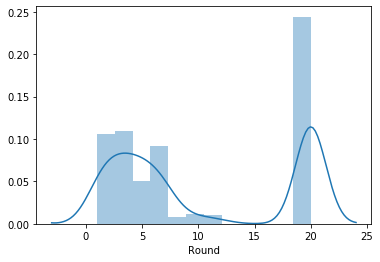

In [341]:
import seaborn as sns
sns.distplot(x['Round']);

# Explore and clean data

In [211]:
# First we will make a copy of df to work with, and later create a function to do everything we explore here
x = df.copy()

In [212]:
x.head()

,Year,Name,YearName,College,POS,Height,Weight,Hand Size,Arm Length,Wonderlic,40 Yard,Bench Press,Vert Leap,Broad Jump,Shuttle,3Cone,60Yd Shuttle,Pick,Round
0,2015,Ameer Abdullah,2015Ameer Abdullah,Nebraska,RB,68.75,205,8.63,30.00,NaN,4.60,24.0,42.5,130.0,3.95,6.79,11.18,54.0,2.0
1,2015,Nelson Agholor,2015Nelson Agholor,Southern California,WR,72.13,198,9.25,32.25,NaN,4.42,12.0,NaN,NaN,NaN,NaN,NaN,20.0,1.0
2,2015,Malcolm Agnew,2015Malcolm Agnew,Southern Illinois,RB,70.00,202,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Jay Ajayi,2015Jay Ajayi,Boise State,RB,71.75,221,10.00,32.00,24.0,4.57,19.0,39.0,121.0,4.10,7.10,11.10,149.0,5.0
4,2015,Brandon Alexander,2015Brandon Alexander,Central Florida,FS,74.00,195,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
x['POS'].unique()

array(['RB', 'WR', 'FS', 'OLB', 'CB', 'DE', 'ILB', 'TE', 'C', 'DT', 'SS',
       'OT', 'P', 'OG', 'QB', 'K', 'FB', 'LS'], dtype=object)

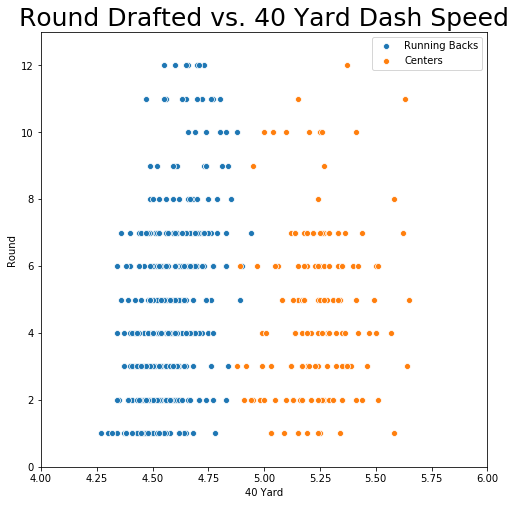

In [324]:
import matplotlib.pyplot as plt

# with plt.style.context('fivethirtyeight'):
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=x[x['POS'] == 'RB'], x='40 Yard', y='Round', label='Running Backs')
sns.scatterplot(data=x[x['POS'] == 'C'], x='40 Yard', y='Round', label='Centers')
ax.set_ylim(0,13)
ax.set_xlim(4, 6)
ax.axhline(0, lw=.5, color='black')
ax.legend(loc=1)
ax.set_title('Round Drafted vs. 40 Yard Dash Speed', size=25);

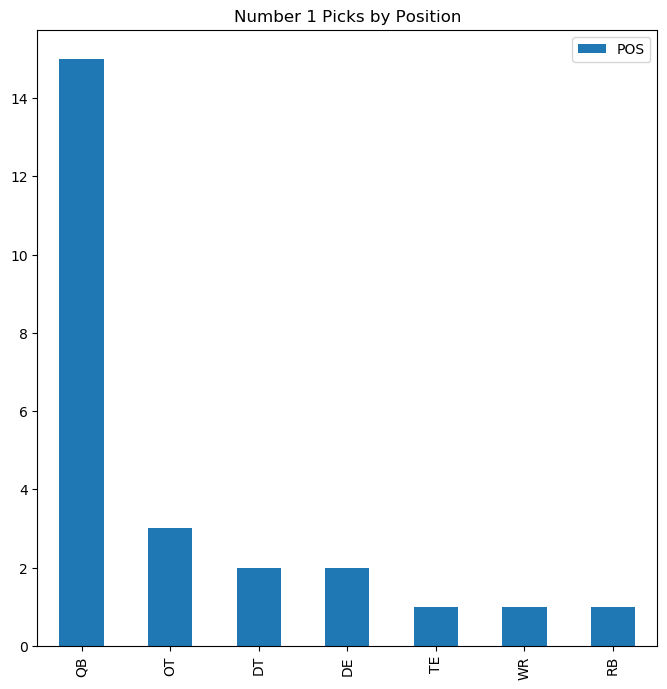

In [320]:
plotter = pd.DataFrame((x[x['Pick'] == 1]).POS.value_counts())
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    plotter.plot.bar(ax=ax)
    ax.set_title('Number 1 Picks by Position')

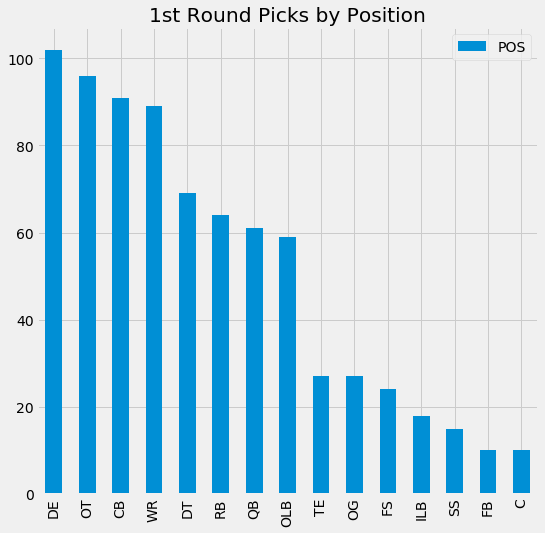

In [323]:
plotter1 = pd.DataFrame((x[x['Round'] == 1]).POS.value_counts())
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(8,8))
    plotter1.plot.bar(ax=ax)
    ax.set_title('1st Round Picks by Position')